In [1]:
from keras.layers import Input, Dense, Activation, Dropout, LeakyReLU, Lambda, PReLU
from keras.models import Model, Sequential, model_from_json
from keras.callbacks import EarlyStopping
from keras import optimizers, activations, regularizers
from keras import backend as K
from sklearn.model_selection import train_test_split, KFold
from numpy import loadtxt
from keras.models import load_model, model_from_json
from keras.backend import sigmoid
from keras.utils.generic_utils import get_custom_objects
import json
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py

Using TensorFlow backend.


In [2]:
class Swish(Activation):
    
    def __init__(self, activation, **kwargs):
        super(Swish, self).__init__(activation, **kwargs)
        self.__name__ = 'swish'

def swish(x):
    return (sigmoid(x) * x)

get_custom_objects().update({'swish': Swish(swish)})

In [3]:
'''1x1 filter'''
with open('/Users/maggiezhang/Dropbox/AtmosphereMachineLearning/DensityData/Models/1x1filter_JB2008.json','r') as f:
    model_encoder_json = json.load(f)
    model_encoder_json = json.dumps(model_encoder_json)
    model_encoder_json = str(model_encoder_json)

model_encoder = model_from_json(model_encoder_json)
model_encoder.load_weights('/Users/maggiezhang/Desktop/1x1filter_JB2008.h5')

In [4]:
encoder_model_1x1 = Model(inputs=model_encoder.input, outputs=model_encoder.layers[8].output)
encoder_model_1x1.summary()

decode_input = Input(model_encoder.layers[9].input_shape[1:])
decoder_model_1x1 = decode_input
for layer in model_encoder.layers[9:]:
    decoder_model_1x1 = layer(decoder_model_1x1)
decoder_model_1x1 = Model(inputs=decode_input, outputs=decoder_model_1x1)
decoder_model_1x1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 24, 20, 36, 1)     0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 24, 20, 1, 491)    18167     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 20, 1, 491)    96        
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 24, 1, 1, 403)     3957863   
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 1, 1, 403)     96        
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 1, 1, 1, 123)      1189779   
_________________________________________________________________
batch_normalization_3 (Batch (None, 1, 1, 1, 123)      4   

In [9]:
'''DONT RUN JUST TO SAVE DATA'''
dens_data = encoder_model_1x1.predict(xmat)
np.save("JB_AE_Reduced_data.npy", dens_data)

In [12]:
data_header = "/Users/maggiezhang/Dropbox/AtmosphereMachineLearning/DensityData/"

data0 = scipy.io.loadmat(data_header+"1999_JB2008_density.mat")
data1 = scipy.io.loadmat(data_header+"2000_JB2008_density.mat")
data2 = scipy.io.loadmat(data_header+"2001_JB2008_density.mat")
data3 = scipy.io.loadmat(data_header+"2002_JB2008_density.mat")
data4 = scipy.io.loadmat(data_header+"2003_JB2008_density.mat")
data5 = scipy.io.loadmat(data_header+"2004_JB2008_density.mat")
data6 = scipy.io.loadmat(data_header+"2005_JB2008_density.mat")
data7 = scipy.io.loadmat(data_header+"2006_JB2008_density.mat")
data8 = scipy.io.loadmat(data_header+"2007_JB2008_density.mat")
data9 = scipy.io.loadmat(data_header+"2008_JB2008_density.mat")
data10 = scipy.io.loadmat(data_header+"2009_JB2008_density.mat")
data11 = scipy.io.loadmat(data_header+"2010_JB2008_density.mat")
dens_data = np.concatenate((data0['densityData'].T, data1['densityData'].T,
                        data2['densityData'].T, data3['densityData'].T, data4['densityData'].T, data5['densityData'].T,
                        data6['densityData'].T, data7['densityData'].T, data8['densityData'].T, data9['densityData'].T,
                        data10['densityData'].T, data11['densityData'].T), axis = 0).T
np.save("JB_Concat_data.npy", dens_data)
dens_data = encoder_model_1x1.predict(dens_data)
np.save("JB_AE_Reduced_data.npy", dens_data)



ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 6972 and the array at index 1 has size 8784

In [13]:
dens_data = np.concatenate((data0['densityData'].T, data1['densityData'].T,
                        data2['densityData'].T, data3['densityData'].T, data4['densityData'].T, data5['densityData'].T,
                        data6['densityData'].T, data7['densityData'].T, data8['densityData'].T, data9['densityData'].T,
                        data10['densityData'].T, data11['densityData'].T), axis = 0).T
print(dens_data.shape)

(17280, 103404)


In [14]:
np.save("JB_Concat_data.npy", dens_data.T)
dens_data = encoder_model_1x1.predict(dens_ data.T)
np.save("JB_AE_Reduced_data.npy", dens_data)

ValueError: Error when checking input: expected input_1 to have 5 dimensions, but got array with shape (103404, 17280)

In [5]:
xdata= np.load("JB_Concat_data.npy")
xdata_1 = np.log10(xdata)
JBstd = np.std(xdata_1, keepdims=True)
JBmean = np.mean(xdata_1, keepdims=True)
xmat = (xdata_1 - JBmean)/JBstd
xmat = np.reshape(xmat, (103404, 24, 20, 36, 1))
dens_data = encoder_model_1x1.predict(xmat)
np.save("JB_AE_Reduced_data.npy", dens_data)

ValueError: cannot reshape array of size 1786821120 into shape (105192,24,20,36,1)

In [6]:
xmat = np.reshape(xmat, (103404, 24, 20, 36, 1))
dens_data = encoder_model_1x1.predict(xmat)
np.save("JB_AE_Reduced_data.npy", dens_data)

In [5]:
dens_data = np.load("JB_AE_Reduced_data.npy")

In [6]:
data_header = "/Users/maggiezhang/Dropbox/AtmosphereMachineLearning/DensityData/"

data0 = scipy.io.loadmat(data_header+"1999_JB2008_sw.mat")
data1 = scipy.io.loadmat(data_header+"2000_JB2008_sw.mat")
data2 = scipy.io.loadmat(data_header+"2001_JB2008_sw.mat")
data3 = scipy.io.loadmat(data_header+"2002_JB2008_sw.mat")
data4 = scipy.io.loadmat(data_header+"2003_JB2008_sw.mat")
data5 = scipy.io.loadmat(data_header+"2004_JB2008_sw.mat")
data6 = scipy.io.loadmat(data_header+"2005_JB2008_sw.mat")
data7 = scipy.io.loadmat(data_header+"2006_JB2008_sw.mat")
data8 = scipy.io.loadmat(data_header+"2007_JB2008_sw.mat")
data9 = scipy.io.loadmat(data_header+"2008_JB2008_sw.mat")
data10 = scipy.io.loadmat(data_header+"2009_JB2008_sw.mat")
data11 = scipy.io.loadmat(data_header+"2010_JB2008_sw.mat")

                  
sw_data = np.concatenate((data0['SWdata'].T, data1['SWdata'].T,
                        data2['SWdata'].T, data3['SWdata'].T, data4['SWdata'].T, data5['SWdata'].T,
                        data6['SWdata'].T, data7['SWdata'].T, data8['SWdata'].T, data9['SWdata'].T,
                        data10['SWdata'].T, data11['SWdata'].T), axis = 1).T


In [7]:
print(sw_data.shape)
print(dens_data.shape)

(103404, 14)
(103404, 10)


In [8]:
pred_number = 48

# Only consider first 10 modes/dimensions of reduced data
dens_data = dens_data[:,0:10]

'''Training data'''
# Training input

split_15 = int(dens_data.shape[0]*0.85) # manual test split 

dens_data_train = dens_data[0:split_15-pred_number,:]
sw_data_train = sw_data[0:split_15-pred_number,:]
sw_data_train_append = sw_data[1:split_15-pred_number+1,:] #looks at next sw timestep because it could be useful in prediction 
sw_data_train = np.concatenate((sw_data_train, sw_data_train_append), axis=1)
# Input is reduced-order density and space weather data
x_train = np.concatenate((dens_data_train, sw_data_train), axis=1)
# Training output
y_train = dens_data[1:split_15-pred_number+1,:]

'''ROM LINEAR MATRICES''' 
Om = np.append(np.transpose(dens_data_train), np.transpose(sw_data_train), axis = 0)
X2 = np.transpose(y_train)

# Compute dynamic matrices:
# Phi = X2*pinv(Om)
Phi = np.matmul(X2,np.linalg.pinv(Om))

r = 10 #reduced order 
A = Phi[:r, :r]
B = Phi[:r, r:]

'''Test data'''
# Test input
dens_data_test = dens_data[split_15-pred_number-1:-pred_number-2,:]
sw_data_test = sw_data[split_15-pred_number-1:-pred_number-2,:]
sw_data_test_append = sw_data[split_15-pred_number:-pred_number-1,:]
sw_data_test = np.concatenate((sw_data_test, sw_data_test_append), axis = 1)
print(sw_data_test.shape)
print(dens_data_test.shape)
# Input is reduced-order density and space weather data
x_test = np.concatenate((dens_data_test, sw_data_test), axis=1)

# Test output
y_test = dens_data[split_15-pred_number:-pred_number-1,:]

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.17647) #, random_state=42)

(15510, 28)
(15510, 10)


In [11]:
model = Sequential()
model.add(Dense(120, kernel_initializer='random_uniform'))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(40, kernel_initializer='random_uniform'))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(20, kernel_initializer='random_uniform'))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(10, kernel_initializer='random_uniform'))
ad = optimizers.Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer=ad, loss='mse', metrics=['accuracy'])

In [16]:
history = model.fit(x = x_train, y = y_train, validation_data = (x_val, y_val), epochs = 500, batch_size = 32)

Train on 72342 samples, validate on 15503 samples
Epoch 1/500
72342/72342 [==============================] - 2s 29us/step - loss: 4.4819e-04 - accuracy: 0.9979 - val_loss: 4.9908e-04 - val_accuracy: 0.9979
Epoch 2/500
72342/72342 [==============================] - 2s 28us/step - loss: 5.4733e-04 - accuracy: 0.9983 - val_loss: 5.3426e-04 - val_accuracy: 0.9971
Epoch 3/500
72342/72342 [==============================] - 2s 28us/step - loss: 4.7589e-04 - accuracy: 0.9981 - val_loss: 1.7609e-04 - val_accuracy: 0.9991
Epoch 4/500
72342/72342 [==============================] - 2s 28us/step - loss: 5.0573e-04 - accuracy: 0.9979 - val_loss: 3.4539e-04 - val_accuracy: 0.9978
Epoch 5/500
72342/72342 [==============================] - 2s 34us/step - loss: 5.0958e-04 - accuracy: 0.9978 - val_loss: 4.6669e-04 - val_accuracy: 0.9974
Epoch 6/500
72342/72342 [==============================] - 2s 31us/step - loss: 4.7499e-04 - accuracy: 0.9981 - val_loss: 5.2956e-04 - val_accuracy: 0.9986
Epoch 7/500
72

72342/72342 [==============================] - 2s 28us/step - loss: 3.6873e-04 - accuracy: 0.9984 - val_loss: 1.1342e-04 - val_accuracy: 0.9986
Epoch 54/500
72342/72342 [==============================] - 2s 28us/step - loss: 3.2724e-04 - accuracy: 0.9986 - val_loss: 2.0331e-04 - val_accuracy: 0.9982
Epoch 55/500
72342/72342 [==============================] - 2s 29us/step - loss: 3.7014e-04 - accuracy: 0.9984 - val_loss: 3.6049e-04 - val_accuracy: 0.9992
Epoch 56/500
72342/72342 [==============================] - 2s 28us/step - loss: 3.5054e-04 - accuracy: 0.9982 - val_loss: 1.6577e-04 - val_accuracy: 0.9989
Epoch 57/500
72342/72342 [==============================] - 2s 28us/step - loss: 3.9394e-04 - accuracy: 0.9986 - val_loss: 5.9882e-04 - val_accuracy: 0.9975
Epoch 58/500
72342/72342 [==============================] - 2s 30us/step - loss: 3.1290e-04 - accuracy: 0.9985 - val_loss: 1.5140e-04 - val_accuracy: 0.9991
Epoch 59/500
72342/72342 [==============================] - 2s 31us/ste

Epoch 157/500
72342/72342 [==============================] - 2s 31us/step - loss: 2.4112e-04 - accuracy: 0.9985 - val_loss: 1.6676e-04 - val_accuracy: 0.9999
Epoch 158/500
72342/72342 [==============================] - 2s 30us/step - loss: 2.2966e-04 - accuracy: 0.9988 - val_loss: 4.6018e-04 - val_accuracy: 0.9978
Epoch 159/500
72342/72342 [==============================] - 2s 30us/step - loss: 2.3210e-04 - accuracy: 0.9986 - val_loss: 1.5097e-04 - val_accuracy: 0.9997
Epoch 160/500
72342/72342 [==============================] - 2s 30us/step - loss: 2.2921e-04 - accuracy: 0.9988 - val_loss: 1.2925e-04 - val_accuracy: 0.9993
Epoch 161/500
72342/72342 [==============================] - 2s 31us/step - loss: 2.6094e-04 - accuracy: 0.9987 - val_loss: 7.5520e-05 - val_accuracy: 0.9998
Epoch 162/500
72342/72342 [==============================] - 2s 31us/step - loss: 2.3454e-04 - accuracy: 0.9988 - val_loss: 1.9790e-04 - val_accuracy: 0.9983
Epoch 163/500
72342/72342 [=========================

Epoch 209/500
72342/72342 [==============================] - 3s 35us/step - loss: 2.5349e-04 - accuracy: 0.9986 - val_loss: 2.2576e-04 - val_accuracy: 0.9971
Epoch 210/500
72342/72342 [==============================] - 2s 33us/step - loss: 2.0401e-04 - accuracy: 0.9989 - val_loss: 7.3288e-05 - val_accuracy: 0.9995
Epoch 211/500
72342/72342 [==============================] - 2s 32us/step - loss: 2.1533e-04 - accuracy: 0.9988 - val_loss: 0.0022 - val_accuracy: 0.9929
Epoch 212/500
72342/72342 [==============================] - 2s 30us/step - loss: 2.2511e-04 - accuracy: 0.9987 - val_loss: 1.3155e-04 - val_accuracy: 0.9997
Epoch 213/500
72342/72342 [==============================] - 2s 31us/step - loss: 2.0384e-04 - accuracy: 0.9989 - val_loss: 2.4038e-04 - val_accuracy: 0.9993
Epoch 214/500
72342/72342 [==============================] - 2s 30us/step - loss: 2.1701e-04 - accuracy: 0.9990 - val_loss: 1.2574e-04 - val_accuracy: 0.9997
Epoch 215/500
72342/72342 [=============================

Epoch 261/500
72342/72342 [==============================] - 2s 33us/step - loss: 1.7890e-04 - accuracy: 0.9989 - val_loss: 7.0814e-05 - val_accuracy: 0.9988
Epoch 262/500
72342/72342 [==============================] - 2s 32us/step - loss: 1.9391e-04 - accuracy: 0.9988 - val_loss: 8.6607e-05 - val_accuracy: 0.9988
Epoch 263/500
72342/72342 [==============================] - 2s 30us/step - loss: 1.7816e-04 - accuracy: 0.9989 - val_loss: 1.1750e-04 - val_accuracy: 0.9996
Epoch 264/500
72342/72342 [==============================] - 2s 30us/step - loss: 1.9530e-04 - accuracy: 0.9987 - val_loss: 1.2050e-04 - val_accuracy: 0.9995
Epoch 265/500
72342/72342 [==============================] - 2s 31us/step - loss: 1.8069e-04 - accuracy: 0.9989 - val_loss: 1.9672e-04 - val_accuracy: 0.9984
Epoch 266/500
72342/72342 [==============================] - 2s 32us/step - loss: 1.7563e-04 - accuracy: 0.9988 - val_loss: 7.1991e-05 - val_accuracy: 0.9995
Epoch 267/500
72342/72342 [=========================

Epoch 313/500
72342/72342 [==============================] - 2s 27us/step - loss: 1.7513e-04 - accuracy: 0.9989 - val_loss: 7.0084e-05 - val_accuracy: 0.9990
Epoch 314/500
72342/72342 [==============================] - 2s 27us/step - loss: 1.6916e-04 - accuracy: 0.9991 - val_loss: 2.5595e-04 - val_accuracy: 0.9992
Epoch 315/500
72342/72342 [==============================] - 2s 27us/step - loss: 2.0237e-04 - accuracy: 0.9989 - val_loss: 1.9179e-04 - val_accuracy: 0.9985
Epoch 316/500
72342/72342 [==============================] - 2s 28us/step - loss: 1.5246e-04 - accuracy: 0.9990 - val_loss: 1.3241e-04 - val_accuracy: 0.9987
Epoch 317/500
72342/72342 [==============================] - 2s 28us/step - loss: 1.7177e-04 - accuracy: 0.9990 - val_loss: 1.7871e-04 - val_accuracy: 0.9997
Epoch 318/500
72342/72342 [==============================] - 2s 28us/step - loss: 1.7073e-04 - accuracy: 0.9990 - val_loss: 1.0364e-04 - val_accuracy: 0.9992
Epoch 319/500
72342/72342 [=========================

Epoch 365/500
72342/72342 [==============================] - 2s 31us/step - loss: 1.4818e-04 - accuracy: 0.9990 - val_loss: 2.1681e-04 - val_accuracy: 0.9988
Epoch 366/500
72342/72342 [==============================] - 2s 31us/step - loss: 1.6333e-04 - accuracy: 0.9989 - val_loss: 6.1751e-05 - val_accuracy: 0.9993
Epoch 367/500
72342/72342 [==============================] - 2s 31us/step - loss: 1.5055e-04 - accuracy: 0.9990 - val_loss: 2.0009e-04 - val_accuracy: 0.9988
Epoch 368/500
72342/72342 [==============================] - 2s 31us/step - loss: 1.6266e-04 - accuracy: 0.9989 - val_loss: 2.5029e-04 - val_accuracy: 0.9988
Epoch 369/500
72342/72342 [==============================] - 2s 32us/step - loss: 1.4595e-04 - accuracy: 0.9990 - val_loss: 1.7820e-04 - val_accuracy: 0.9983
Epoch 370/500
72342/72342 [==============================] - 2s 31us/step - loss: 1.6048e-04 - accuracy: 0.9988 - val_loss: 1.5807e-04 - val_accuracy: 0.9997
Epoch 371/500
72342/72342 [=========================

KeyboardInterrupt: 

NameError: name 'history' is not defined

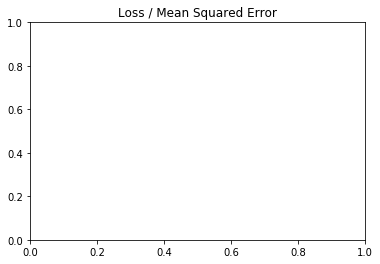

In [23]:
plt.figure()
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [20]:
model_json = model.to_json()
with open("NN_model_JB_1x1_fixed.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("NN_model_JB_1x1_fixed.h5")
print("Saved model")


Saved model


In [10]:
with open('NN_model_JB_1x1_fixed.json','r') as f:
    model_NN_json = json.load(f)
    model_NN_json = json.dumps(model_NN_json)
    model_NN_json = str(model_NN_json)

model_NN = model_from_json(model_NN_json)
model_NN.load_weights('NN_model_JB_1x1_fixed.h5')
model_NN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 120)               4680      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 120)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 40)                4840      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 40)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                820       
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 20)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

[[9.29794582e-05 1.96831529e-04 2.84392986e-04 3.48675726e-04
  3.93107480e-04 4.23040630e-04 4.44054225e-04 4.60128046e-04
  4.74061554e-04 4.87487665e-04 5.00988791e-04 5.14824706e-04
  5.29234030e-04 5.43530462e-04 5.57585765e-04 5.71332547e-04
  5.84688758e-04 5.97527834e-04 6.09771807e-04 6.21405232e-04
  6.32430371e-04 6.42901186e-04 6.52773111e-04 6.62092336e-04
  6.70853743e-04 6.79072338e-04 6.86824560e-04 6.94180162e-04
  7.01075935e-04 7.07504892e-04 7.13496943e-04 7.19055284e-04
  7.24202789e-04 7.28991107e-04 7.33428158e-04 7.37555115e-04
  7.41397555e-04 7.44987994e-04 7.48357078e-04 7.51490787e-04
  7.54399008e-04 7.57089611e-04 7.59577846e-04 7.61873601e-04
  7.64000780e-04 7.65936905e-04 7.67751727e-04 7.69446771e-04]]
[[0.00997509 0.01975015 0.0292368  0.03359834 0.0379217  0.0422269
  0.04520961 0.04821105 0.05121237 0.05344269 0.0556857  0.05793889
  0.0599169  0.06190707 0.06388646 0.06556456 0.06727891 0.06900977
  0.07072999 0.07249838 0.07430976 0.07618354 0.078

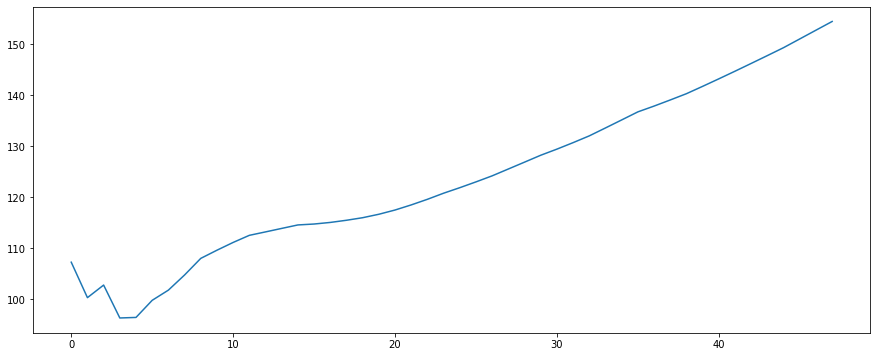

In [11]:
mse_NN = np.zeros((1,pred_number))
mse_ROM = np.zeros((1,pred_number))

x_test_rom = np.copy(x_test)
x_test_NN = np.copy(x_test)
y_test_NN = np.copy(y_test)

prediction_NN = np.empty((15778,10))
prediction_POD = np.empty((15778,10))

for b in range(pred_number):
    y_pred = model_NN.predict(x_test_NN)
    y_test_NN = dens_data[split_15-pred_number+b:-pred_number-1+b,:]
    mse_NN[0][b] = np.sum(np.square(y_test_NN-y_pred))/(y_pred.shape[1]*y_pred.shape[0])
    mse2 = np.sum(np.square(y_pred-y_test_NN),axis = 1)
    sw_data_test = sw_data[split_15-pred_number+b:-pred_number-1+b,:]
    sw_data_test_append = sw_data[split_15-pred_number+1+b:-pred_number+b,:]
    sw_data_test = np.concatenate((sw_data_test, sw_data_test_append), axis = 1)
    x_test_NN = np.concatenate((y_pred, sw_data_test), axis=1)

print(mse_NN) 

for a in range(pred_number):
    y_test = dens_data[split_15-pred_number+a:-pred_number-1+a,:]
    sw_data_test = sw_data[split_15-pred_number-1+a:-pred_number-2+a,:]
    sw_data_test_append = sw_data[split_15-pred_number+a:-pred_number-1+a,:]
    sw_data_test = np.concatenate((sw_data_test, sw_data_test_append), axis = 1)
    if (a!= 0):
        x_test_rom = np.concatenate((x_test_rom, sw_data_test), axis=1)
    sw_data_test_ROM = x_test_rom[:,10:]
    dens_data_test_ROM = x_test_rom[:,:10]
    XfullPred = np.transpose(np.matmul(A,np.transpose(dens_data_test_ROM)) + np.matmul(B,np.transpose(sw_data_test_ROM)))
    prediction_POD = np.append(prediction_POD, XfullPred, axis =0)
    x_test_rom = np.copy(XfullPred)
    errFullPred = abs(XfullPred-y_test)
    mse_ROM[0][a] = np.sum(np.square(errFullPred))/(errFullPred.shape[1]*errFullPred.shape[0])
    mse_rom2 = np.sum(np.square(errFullPred),axis = 1)
    
print(mse_ROM) 

factor = np.divide(np.transpose(mse_ROM), np.transpose(mse_NN))
plt.figure(figsize = (15,6))
plt.plot(factor)
for index, val in enumerate(factor):
    print("index:", index, "factor: ", val)


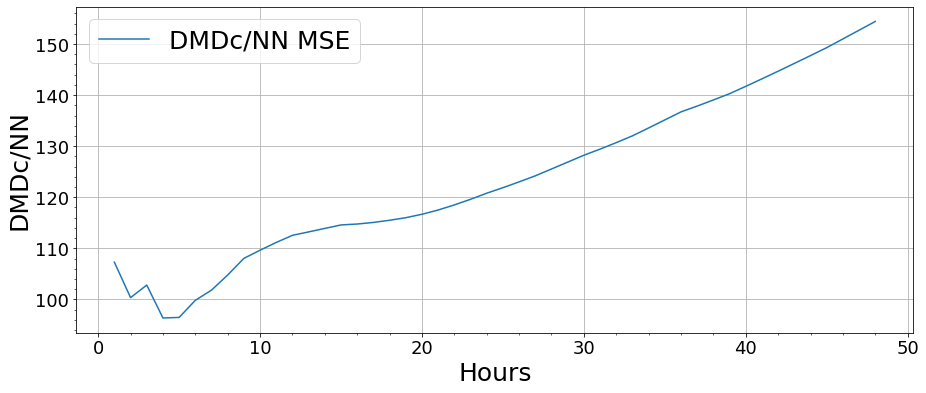

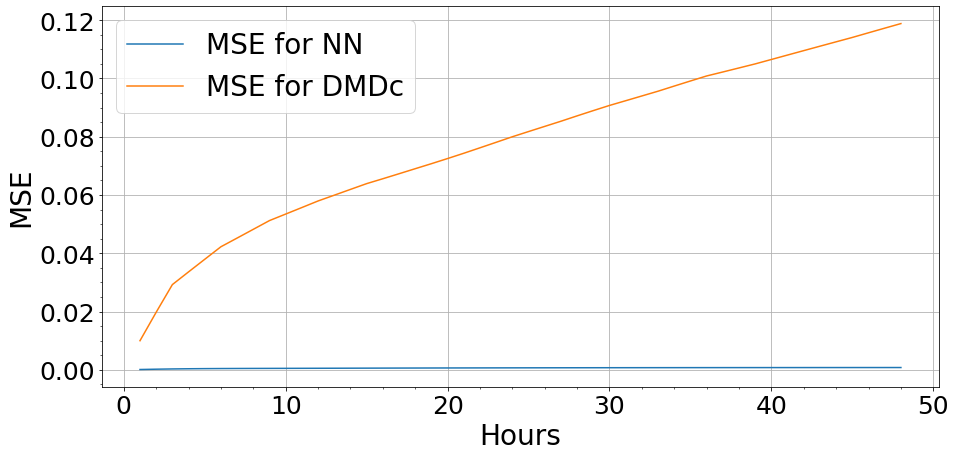

In [13]:
plt.figure(figsize = (15,6))
#plt.title("JB 1999-2010: DMDc/NN MSE for 24 Hours Time Series using 1x1 Autoencoder")
plt.plot(range(1,1+len(factor)),factor, label = "DMDc/NN MSE")
plt.grid()
plt.minorticks_on()
plt.xlabel("Hours", fontsize=25)
plt.ylabel("DMDc/NN", fontsize=25)
plt.legend(fontsize=25)
plt.xticks(size = 18)
plt.yticks(size = 18)
#plt.savefig('1x1_AE_DMDc/NN_Ratio.png')  
#plt.show()


plt.figure(figsize = (15,7))
#plt.title("JB 1999-2010: Comparison of MSE for 24 Hours Time Series using 1x1 Autoencoder")
plt.plot(range(1,1+len(factor)),mse_NN.T, label = "MSE for NN")
plt.plot(range(1,1+len(factor)),mse_ROM.T, label = "MSE for DMDc")
plt.grid()
plt.minorticks_on()
plt.xlabel("Hours",fontsize=28)
plt.ylabel("MSE",fontsize=28)
plt.legend(fontsize=28)
plt.xticks(size = 25)
plt.yticks(size = 25)
plt.savefig('1x1_AE_DMDc_NN_MSE_48.png')
#plt.show()

In [49]:
x_test_NN = x_test[0,:]
x_test_NN= np.reshape(x_test_NN, (1, 38))
x_test_rom = np.reshape(x_test[0,:10], (1, 10))

NN_prediction = None
for b in range(pred_number):
    y_pred = model_NN.predict(x_test_NN)
    if b == 0:
        NN_prediction = y_pred
    else:
        NN_prediction = np.append(NN_prediction, y_pred, axis = 0)
    sw_data_test = np.reshape(sw_data[b,:], (1,14))
    sw_data_test_append = np.reshape(sw_data[b+1,:],(1,14))
    sw_data_test = np.concatenate((sw_data_test, sw_data_test_append), axis = 1)
    x_test_NN = np.concatenate((y_pred, sw_data_test), axis=1)
    
DMDc_prediction = None
for a in range(pred_number):
    #General
    sw_data_test = np.reshape(sw_data[a,:], (1,14))
    sw_data_test_append = np.reshape(sw_data[a+1,:], (1,14))
    sw_data_test = np.concatenate((sw_data_test, sw_data_test_append), axis = 1)
    x_test_rom = np.transpose(np.matmul(A,np.transpose(x_test_rom)) + np.matmul(B,np.transpose(sw_data_test)))
    if not a:
        DMDc_prediction = x_test_rom
    else:
        DMDc_prediction = np.append(DMDc_prediction, x_test_rom, axis = 0)


In [50]:
nndecoded = None
DMDcdecoded = None
for i in range(1,pred_number+1):
    nn_data = NN_prediction[i-1:i,:]
    decoded_nn = decoder_model_1x1.predict(nn_data)
    DMDc_data = DMDc_prediction[i-1:i,:]
    decoded_DMDc = decoder_model_1x1.predict(DMDc_data)
    if i == 1:
        nndecoded = decoded_nn
        DMDcdecoded = decoded_DMDc
    else:
        nndecoded = np.append(nndecoded, decoded_nn, axis = 0)
        DMDcdecoded = np.append(DMDcdecoded, decoded_DMDc, axis = 0)

In [ ]:
nndecoded = nndecoded*MSISEstd + MSISEmean
DMDcdecoded = DMDcdecoded*MSISEstd + MSISEmean
tens = np.full((48,17280), 10)
nndecoded = np.power(tens, nndecoded)
DMDcdecoded = np.power(tens, DMDcdecoded)